project merchine learning

In [2]:
import p_utils as pu
import pandas as pd
import json
from tqdm import tqdm 
import my_utils as mu

In [3]:
query = 'select * from rawdata'
df_s = pu.oracle_totalExecute(query)

oracle open!
oracle close!


In [7]:
df_s['PARTICIPANT_NAME'][0]

'나영주니'

In [4]:
query = 'select * from summoner'
df2 = pu.oracle_totalExecute(query)

oracle open!
oracle close!


In [5]:
df3 = df2.drop(columns=['SUMMONER_ID',
 'SUMMONER_PUUID',
 'API_KEY',
 'SUMMONER_LEVEL',
 'SUMMONER_PROFILE',
 'SUMMONER_WINS',
 'SUMMONER_LOSSES',
 'SUMMONER_VETERAN',
 'SUMMONER_INACTIVE',
 'SUMMONER_FRESHBLOOD',
 'SUMMONER_HOTSTREAK'])

In [6]:
df3 = df3.rename(columns={'SUMMONER_NAME':'PARTICIPANT_NAME'})
df3[:2]

,PARTICIPANT_NAME,SUMMONER_TIER
0,OI용,DIAMOND
1,또 레,PLATINUM


In [73]:
df['PARTICIPANT_NAME'][0]

'나영주니'

In [7]:
df=df.drop(columns=['Unnamed: 0'])

In [8]:
def transfrom(df):
    df_1 = []
    df_k = list(df.keys())
    for i in tqdm(range(len(df))):
        lst = []
        for j in range(len(df_k)):
            if j < 10 :
                lst.append(df[df_k[j]][i])
            else :
                data = df[df_k[j]][i]
                data = data.replace("'", "\"")
                json_data = json.loads(data)
                lst.append(json_data)
        df_1.append(lst)
            
    df_2 = pd.DataFrame(df_1, columns = df_k )
    
    return df_2

In [9]:
cat = transfrom(df_s)

100%|████████████████████████████████████████████████████████████████████████| 364900/364900 [02:32<00:00, 2392.60it/s]


In [12]:
cat2 = pd.merge(cat,df3)
cat2[:2]

,VERSION,GAME_CREATE_TIME,GAME_DURATION,GAME_ID,PARTICIPANT_NUMBER,PARTICIPANT_NAME,CHAMPION_ID,LANE,PARTICIPANT_PUUID,API_KEY,...,ITEM,STARTITEM,ITEMTREE,KDA,GOLD,CS,TURRET,DAMAGE,VISION,SUMMONER_TIER
0,13.7.501.1316,1680696090680,1944,KR_6437691335,7,나영주니,517,JUNGLE,JLKd2cbNmiSSXjs0mLM0KuN5j5vKhGZZ-R8oUdzpOjgnml...,RGAPI-baa753a4-a532-4640-9886-d8f05d8f2b39,...,"{'item0': 3157, 'item1': 1058, 'item2': 3020, ...","[1103, 2003, 3340]","[4636, 4645, 3157]","{'kills': 9, 'deaths': 5, 'assists': 10, 'kda'...","{'bountyLevel': 0, 'bountyGold': 675, 'goldEar...","{'totalMinionsKilled': 39, 'laneMinionsFirst10...","{'turretTakedowns': 1, 'turretPlatesTaken': 3}","{'teamDamagePercentage': 0.261132630640222, 't...","{'visionScore': 38, 'wardsPlaced': 9, 'control...",PLATINUM
1,13.7.501.1316,1680696090680,1944,KR_6437691335,8,유콩순,157,MIDDLE,ee_P3fFZgovCxlsMEe0Poqii_RJ5SfnnYPidb73FKKKwbn...,RGAPI-baa753a4-a532-4640-9886-d8f05d8f2b39,...,"{'item0': 3082, 'item1': 3006, 'item2': 6673, ...","[1054, 2003]","[6673, 3031, 3046]","{'kills': 6, 'deaths': 8, 'assists': 6, 'kda':...","{'bountyLevel': 0, 'bountyGold': 0, 'goldEarne...","{'totalMinionsKilled': 217, 'laneMinionsFirst1...","{'turretTakedowns': 3, 'turretPlatesTaken': 2}","{'teamDamagePercentage': 0.1590381226791062, '...","{'visionScore': 8, 'wardsPlaced': 5, 'controlW...",PLATINUM


In [8]:
cat.to_csv('matchData.csv')

In [26]:
cat['CHAMPION'][0]['win']

'0'

In [65]:
cat['CHAMPION'][0]['championId']

{'championId': 517,
 'championName': 'Sylas',
 'champLevel': 16,
 'lane': 'JUNGLE',
 'individualPosition': 'JUNGLE',
 'teamPosition': 'JUNGLE',
 'teamId': 200,
 'win': '0'}

In [79]:
list(df2.keys())

['SUMMONER_ID',
 'SUMMONER_PUUID',
 'API_KEY',
 'SUMMONER_NAME',
 'SUMMONER_LEVEL',
 'SUMMONER_PROFILE',
 'SUMMONER_TIER',
 'SUMMONER_WINS',
 'SUMMONER_LOSSES',
 'SUMMONER_VETERAN',
 'SUMMONER_INACTIVE',
 'SUMMONER_FRESHBLOOD',
 'SUMMONER_HOTSTREAK']

In [30]:
df2['SUMMONER_NAME'][0]

'OI용'

In [6]:
df3 = df2.drop(columns=['SUMMONER_ID',
 'SUMMONER_PUUID',
 'API_KEY',
 'SUMMONER_LEVEL',
 'SUMMONER_PROFILE',
 'SUMMONER_WINS',
 'SUMMONER_LOSSES',
 'SUMMONER_VETERAN',
 'SUMMONER_INACTIVE',
 'SUMMONER_FRESHBLOOD',
 'SUMMONER_HOTSTREAK'])

In [7]:
df3 = df3.rename(columns={'SUMMONER_NAME':'PARTICIPANT_NAME'})


In [8]:
df3[:10]

,PARTICIPANT_NAME,SUMMONER_TIER
0,OI용,DIAMOND
1,또 레,PLATINUM
2,열심히해보아오,DIAMOND
3,럭스야사랑한다,MASTER
4,괴수 탑,DIAMOND
5,밥음볶우새,DIAMOND
6,우울해,MASTER
7,직 쏘,MASTER
8,괴물쥐코빨고싶다,MASTER
9,Umbridge,DIAMOND


In [33]:
df4 = pd.merge(cat,df3)

In [34]:
int(df4['CHAMPION'][0]['win'])

0

In [35]:
df4.to_csv('mldata.csv')

In [34]:
df4['SUMMONER_TIER'][0]

'PLATINUM'

In [9]:
df_s['GAME_DURATION'][0]

1944

In [4]:
10/round(1944/60)

0.3125

In [46]:
df4.keys()

Index(['VERSION', 'GAME_CREATE_TIME', 'GAME_DURATION', 'GAME_ID',
       'PARTICIPANT_NUMBER', 'PARTICIPANT_NAME', 'CHAMPION_ID', 'LANE',
       'PARTICIPANT_PUUID', 'API_KEY', 'GAME', 'SUMMONER', 'CHAMPION', 'SPELL',
       'SKILL', 'SKILLTREE', 'RUNE', 'ITEM', 'STARTITEM', 'ITEMTREE', 'KDA',
       'GOLD', 'CS', 'TURRET', 'DAMAGE', 'VISION', 'SUMMONER_TIER'],
      dtype='object')

In [16]:
def getData():
    import p_utils as pu
    import pandas as pd
    import json
    from tqdm import tqdm 
    
    print("rawdata 불러오기 시작")
    query1 = 'select * from rawdata'
    df1 = pu.oracle_totalExecute(query1)
    
    print("summoner 불러오기 시작")
    query2 = 'select * from summoner'
    df2 = pu.oracle_totalExecute(query2)
    
    df3 = df2.drop(columns=['SUMMONER_ID',
     'SUMMONER_PUUID',
     'API_KEY',
     'SUMMONER_LEVEL',
     'SUMMONER_PROFILE',
     'SUMMONER_WINS',
     'SUMMONER_LOSSES',
     'SUMMONER_VETERAN',
     'SUMMONER_INACTIVE',
     'SUMMONER_FRESHBLOOD',
     'SUMMONER_HOTSTREAK'])
    df3 = df3.rename(columns={'SUMMONER_NAME':'PARTICIPANT_NAME'})
    
    df_1 = []
    df_k = list(df1.keys())
    print("데이터 변환 시작")
    for i in tqdm(range(len(df1))):
        lst = []
        for j in range(len(df_k)):
            if j < 10 :
                lst.append(df1[df_k[j]][i])
            else :
                data = df1[df_k[j]][i]
                data = data.replace("'", "\"")
                json_data = json.loads(data)
                lst.append(json_data)
        df_1.append(lst)
            
    df_2 = pd.DataFrame(df_1, columns = df_k)
    
    df_4 = []
    print("train 데이터로 변환")
    df_4 = []
    for i in tqdm(range(len(df_2))):
        lst=[]
        
        lst.append(df_2['GAME_ID'][i])
        lst.append(df_2['PARTICIPANT_NAME'][i])
        lst.append(df_2['PARTICIPANT_NUMBER'][i])
        lst.append(df_2['CHAMPION'][i]['win'])
        
        wp = df_2['VISION'][i]['wardsPlaced']
        cwp = df_2['VISION'][i]['controlWardsPlaced']
        wk = df_2['VISION'][i]['wardsKilled']
        vision = wp+cwp+wk 
        lst.append(vision)
        
        cs = df_2['CS'][i]['totalMinionsKilled']
        time = round(df_2['GAME_DURATION'][i]/60)
        cpm = cs/time
        lst.append(cpm)
        
        lst.append(df_3['GAME_DURATION'][i])
        
        kda = df_3['KDA'][i]['kda']
        
        t = df_3['SUMMONER_TIER'][i]
        
        df_4.append(lst)
        
    df_5 = pd.DataFrame(df_4)
    df_5 = df_5.astype({'WIN':int})
    
    
            
    return df_5

In [3]:
df = getData()

rawdata 불러오기 시작
oracle open!
oracle close!
summoner 불러오기 시작
oracle open!
oracle close!
데이터 변환 시작


100%|████████████████████████████████████████████████████████████████████████| 364900/364900 [02:48<00:00, 2162.81it/s]


train 데이터로 변환


100%|████████████████████████████████████████████████████████████████████████| 325201/325201 [01:26<00:00, 3750.48it/s]


KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'WIN' not found in columns."

In [57]:
df.to_csv('plData.csv')

In [26]:
def ml(df_5):
    df_6=[]
    for i in tqdm(range(len(df_5))):
        lst = []
        
        kda = df_5['KDA'][i]['kda']
        w = df_5['CHAMPION'][i]['win']*1
        t = df_5['SUMMONER_TIER'][i]
        
        if t == 'BRONZE' or t == 'Unranked':
            lst.append(kda)
            lst.append(w)
            lst.append(t)
        elif t == 'SILVER':
            lst.append(kda+1)
            lst.append(w)
            lst.append(t)
        elif t == 'GOLD':
            lst.append(kda+2)
            lst.append(w)
            lst.append(t)
        elif t == 'PLATINUM':
            lst.append(kda+3)
            lst.append(w)
            lst.append(t)
        elif t == 'DIAMOND':
            lst.append(kda+4)
            lst.append(w)
            lst.append(t)
        elif t == 'GRANDMASTER':
            lst.append(kda+5)
            lst.append(w)
            lst.append(t)
        elif t == 'CHALLENGER':
            lst.append(kda+6)
            lst.append(w)
            lst.append(t)
                
        df_6.append(lst)
    df_7 = pd.DataFrame(df_6, columns=['KDA','WIN','TIER'])
    df_7 = df_7.dropna(subset=['KDA'], how='any',axis=0)
    remove = df_7[df_7['TIER']=='Unranked'].index
    df_7 = df_7.drop(remove)

    return df_7

In [27]:
df_ml = ml(cat2)

100%|███████████████████████████████████████████████████████████████████████| 325201/325201 [00:16<00:00, 19574.69it/s]


In [30]:
df_ml.dtypes

KDA     float64
WIN      object
TIER     object
dtype: object

In [20]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO 
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression #로지스틱스 함수(모델생성)
from sklearn.preprocessing import StandardScaler #정규화
from sklearn.model_selection import train_test_split #학습세트/평가세트 분리

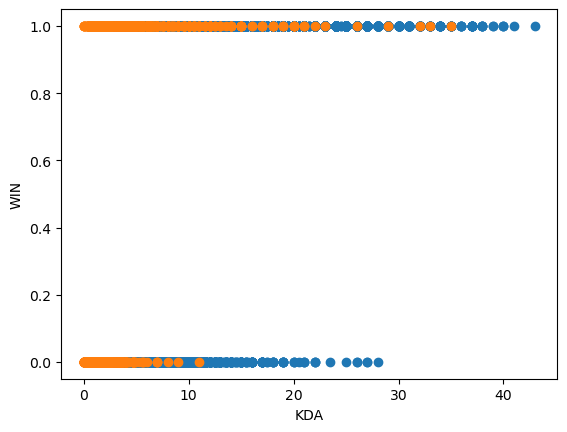

In [63]:
plt.scatter(df2[df2['TIER']=='PLATINUM']['KDA'], df2[df2['TIER']=='PLATINUM']['WIN']) 
plt.scatter(df2[df2['TIER']=='BRONZE']['KDA'], df2[df2['TIER']=='BRONZE']['WIN'])
plt.xlabel('KDA')
plt.ylabel('WIN')
plt.show()

In [51]:
df3 = df2.dropna(subset=['KDA'], how='any',axis=0)
df3

,KDA,WIN,TIER
0,11.000000,0,PLATINUM
1,6.750000,0,PLATINUM
2,3.800000,0,PLATINUM
3,6.000000,0,PLATINUM
4,4.500000,0,PLATINUM
...,...,...,...
325196,3.875000,0,PLATINUM
325197,7.857143,0,PLATINUM
325198,21.000000,1,PLATINUM
325199,2.142857,0,PLATINUM


In [61]:
df4 = round(df3['KDA'],6)

In [63]:
df4

0         11.000000
1          6.750000
2          3.800000
3          6.000000
4          4.500000
            ...    
325196     3.875000
325197     7.857143
325198    21.000000
325199     2.142857
325200     4.666667
Name: KDA, Length: 321358, dtype: float64

In [76]:
df[0]

KeyError: 0

In [59]:
df2['TIER'].unique()

array(['PLATINUM', 'Unranked', 'GOLD', 'DIAMOND', 'SILVER', 'BRONZE',
       'GRANDMASTER', 'CHALLENGER'], dtype=object)

In [82]:
'GAME_ID','CHAMP_ID','SUMMONER','KDA','WIN','wardsPlaced','controlWardsPlaced','wardsKilled','totalMinionsKilled','GAME_DURATION'

('GAME_ID',
 'CHAMP_ID',
 'SUMMONER',
 'KDA',
 'WIN',
 'wardsPlaced',
 'controlWardsPlaced',
 'wardsKilled',
 'totalMinionsKilled',
 'GAME_DURATION')

In [84]:
df2.keys()

Index(['CHAMP_ID', 'KDA', 'WIN', 'wardsPlaced', 'controlWardsPlaced',
       'wardsKilled', 'totalMinionsKilled', 'GAME_DURATION'],
      dtype='object')

In [85]:
tier_input = df2[['CHAMP_ID','KDA','WIN','wardsPlaced','controlWardsPlaced','wardsKilled','totalMinionsKilled','GAME_DURATION'].to_numpy()

SyntaxError: unexpected EOF while parsing (4260379766.py, line 1)

In [71]:
tier_target = df2['SUMMONER_TIER'].to_numpy()

In [72]:
train_input, test_input, train_target, test_target = train_test_split(tier_input, tier_target, random_state=42)

In [73]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [74]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.6111070110701107
0.36337806423045227


In [40]:
X_train, X_test, y_train, y_test = train_test_split(tier_input, tier_target, random_state=42)

In [54]:
test_arr=list(df2.iloc[0])
test_input = np.asarray([test_arr])
X_test = test_input.reshape(-1, len(test_arr))

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

ValueError: setting an array element with a sequence.

In [48]:
test_arr.type()

AttributeError: 'list' object has no attribute 'type'

In [91]:
y_pred

array(['PLATINUM'], dtype=object)

In [80]:
df2 = df.drop(columns=['GAME_ID','SUMMONER','LANE','SUMMONER_TIER'])

In [29]:
lst50 = list(df2.iloc[0])

In [34]:
df.keys()

Index(['GAME_ID', 'CHAMP_ID', 'SUMMONER', 'KDA', 'WIN', 'LANE', 'wardsPlaced',
       'controlWardsPlaced', 'wardsKilled', 'totalMinionsKilled',
       'GAME_DURATION', 'SUMMONER_TIER'],
      dtype='object')